<a href="https://colab.research.google.com/github/TWaugh12/Projects/blob/main/MNISTFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set
x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
0 T-shirt/top
 1 Trouser
 2 Pullover
 3 Dress
 4 Coat
 5 Sandal
 6 Shirt
 7 Sneaker
 8 Bag
 9 Ankle boot


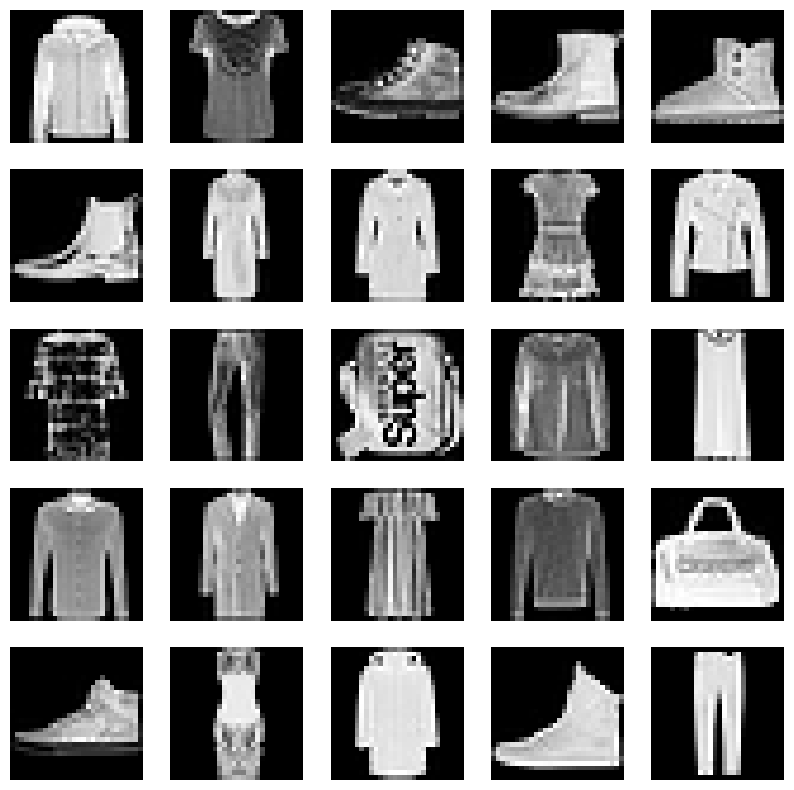

In [ ]:
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
list_class_names = "0 T-shirt/top\n 1 Trouser\n 2 Pullover\n 3 Dress\n 4 Coat\n 5 Sandal\n 6 Shirt\n 7 Sneaker\n 8 Bag\n 9 Ankle boot"
print(list_class_names)
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for img_index in range(25):
    ax = axes[img_index // 5, img_index % 5]
    ax.imshow(x_train[img_index], cmap='gray')
    ax.axis('off')

plt.show()

In [ ]:
import keras
from keras import layers, models
input_shape = x_train.shape[1:]
print(input_shape)
# Define model
model = models.Sequential(
    [
        layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape = input_shape),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(10, activation = "softmax")
    ]
)

model.summary()


(28, 28, 1)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 1568)              0         
                                                                 
 dense_8 (Dense)             (None, 10)  

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
1718/1719 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.8256
Epoch 1: val_loss improved from inf to 0.37921, saving model to model.weights.best.hdf5
1719/1719 [==============================] - 41s 23ms/step - loss: 0.6329 - accuracy: 0.8255 - val_loss: 0.3792 - val_accuracy: 0.8672
Epoch 2/10
   3/1719 [..............................] - ETA: 55s - loss: 0.2959 - accuracy: 0.8854 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - ETA: 0s - loss: 0.3414 - accuracy: 0.8756
Epoch 2: val_loss improved from 0.37921 to 0.33430, saving model to model.weights.best.hdf5
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3414 - accuracy: 0.8756 - val_loss: 0.3343 - val_accuracy: 0.8844
Epoch 3/10
1717/1719 [============================>.] - ETA: 0s - loss: 0.3049 - accuracy: 0.8896
Epoch 3: val_loss improved from 0.33430 to 0.31823, saving model to model.weights.best.hdf5
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3050 - accuracy: 0.8896 - val_loss: 0.3182 - val_accuracy: 0.8840
Epoch 4/10
1719/1719 [==============================] - ETA: 0s - loss: 0.2877 - accuracy: 0.8936
Epoch 4: val_loss did not improve from 0.31823
1719/1719 [==============================] - 38s 22ms/step - loss: 0.2877 - accuracy: 0.8936 - val_loss: 0.3309 - val_accuracy: 0.8892
Epoch 5/10
1719/1719 [==============================] - ETA: 0s - loss: 0.2696 - 

In [ ]:
from sklearn.metrics import confusion_matrix


# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_mtx)


 Test accuracy: 0.8838000297546387
313/313 [==============================] - 5s 15ms/step

Confusion Matrix:
[[827   7  12  23  10   3 114   0   4   0]
 [  1 983   1   9   5   0   1   0   0   0]
 [ 21   1 779   7 103   0  89   0   0   0]
 [ 17  15  10 870  43   0  42   0   3   0]
 [  2   1  60  21 786   0 128   0   2   0]
 [  0   0   0   0   0 984   0  12   1   3]
 [127   3  58  25  61   0 716   0  10   0]
 [  0   0   0   0   0  15   0 955   0  30]
 [  5   1   4   2   2   3   4   2 977   0]
 [  0   0   0   0   0  10   1  28   0 961]]
